<a href="https://colab.research.google.com/github/uol-mediaprocessing-2022-2023-classroom/project-creative-design-tips/blob/feat%2Fdoku/Documentation/documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Einleitung
Im Rahmen des Projektes "Creative Design Tips" im Modul Medienverarbeitung sollten kreative Gestaltungstips aus einem Video von CEWE in Form einer Software vereinfacht bzw. automatisiert werden. Hierbei handelt es sich um die zwei Ansätze Bild-im-Bild und Out-of-Image. Bei Bild-im-Bild wir ein Teil des Bildes innerhalb des selben Bildes positioniert und so angepasst, dass die Objekte bzw. Kanten einigermaßen zusammen passen. Das Bild im Hintergrund wird zudem mit einem Filter versehen um es verschwommen darstellen zu können. Zusätzlich wird noch ein Rahmen an das innere Bild angebracht.

Ein Beispiel für Bild-im-Bild stellt folgendes Bild dar:

![](https://cloud.uni-oldenburg.de/s/Ki3gPzma9aHxeGq/preview)

Bei Out-Of-Image wird ein Aspektes des Bildes, wie z.B. eine Straße, Schienen oder Dünengras außerhalb des eigentlichen Bildes erweitert. Hierzu wird der Teil des Bildes identifiziert und mithilfe von Filtern an das eigentliche Bild heran modeliert.

Beispiele für Out-of-Image stellen folgende Bilder dar:
![](https://cloud.uni-oldenburg.de/s/TZZe7oiELPFyc3Y/preview)
![](https://cloud.uni-oldenburg.de/s/byZAFT9NMcL9H3q/preview)

Für die Umsetzung und Automatisierung dieser Methoden sollen Bildverarbeitungsmethoden in Python auf beliebige Bilder angewendet werden können. Die Nutzer sollen dann über eine grafische Oberfläche ihre Bilder für die Bearbeitung angeben können und ein verarbeitetes Bild zurückerhalten.

Im Rahmen der Arbeit haben wir uns daher zu erst mit der Zielsetzung für unsere Arbeit beschäftigt, anschließend haben wir begonnen die grundlegende Funktion für Bild-im-Bild zu implementieren. Nachfolgend haben wir eine Überarbeitung des grundlegenden Frontends durchgeführt um Probleme, die mit der Vorlage aufgetreten sind, zu beseitigen. Anschließend haben wir Out-of-Image mit Hilfe der Hough-Transformation und einer KI implementiert.

Im Rahmen der Fertigstellung der Projektes wurden noch weitere Anpassungen am Frontend und der Bild-im-Bild-Vearbeitung vorgenommen.

# Grundlagen
## Workflow
Zu Beginn des Projektes wurde zeitnah auf ein SCRUM-basiertes Vorgehen gesetzt um die Aufgaben besser zu verteilen. Hierzu wurde auf JIRA gesetzt und entsprechende Tickets erstellt.

Als Ablauf für die Scrum-Periode wurden im Durchschnitt 2 Wochen festgelegt. Gelegentlich wurden die Iterationen auf 1 Woche verkürzt. Für den Austausch wurde 1 wöchentliches Meeting festgelegt + ggf. kurzfristige Zusatztermine.

## Anforderungen

Grundlage unserer Arbeit ist das Video von CEWE zum Thema kreativer Designvorschläge für Fotobücher.

Referenzvideo: https://www.youtube.com/watch?v=dlzPCY1d4sw (siehe Codeblock unten)

Ausgehend davon haben wir unsere Anforderungen an unser "Produkt" wie folgt definiert:

- App soll **“Bild im Bild”** mit fast beliebigen Bildern ermöglichen
	- Fokusauswahl, daraufhin Veränderung des Hintergrundes
    - -> CEWE Video mit weniger Klicks


- App soll **“Fotos, die aus dem Rahmen Laufen”** für geeignete Bilder ermöglichen
	- Automatische Kantenausrichtung für einen ausgewählten Bildausschnitt des Bildes an ausgewählter Stelle
    - -> CEWE Video mit weniger Klicks

In [ ]:
from IPython.display import HTML

# Referenzvideo

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/dlzPCY1d4sw?start=110" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')


## Zielsetzung
Bei unserer Zielsetzung haben wir initial uns Stichpunkte hinsichtlich der inhaltlichen Umsetzung definiert:

* 1 Anwendung für beide Funktionen (Desktop only)
* Bild im Bild: positionierbar und Größe des inneren Bildes einstellbar, Stärke der Weichzeichnung konfigurierbar
* out of image: Bildbereich für die "Verlängerung" auswählbar, positionierbar vom Nutzer, anschließend automatische Kantenausrichtung (KI)

### Erste Versionen
Ausgehend von den Stichpunkten haben wir eine erste Version der Zielsetzung verfasst:

Die Desktopanwendung bietet eine softwareunterstützte Erstellung von Bildern mit visuellen Effekten "Bild im Bild" und "out of image". Die Software führt den Nutzer hierfür Schritt für Schritt durch den Erstellungsprozess und nimmt dem Nutzer Teile des Erstellungsprozesses ab.

Bild im Bild beinhaltet das Weichzeichnen eines auswählbaren Rahmenbereichs

out of image gibt dem Nutzer die Möglichkeit, einen Bildbereich auszuwählen, welcher zur Verlängerung des Bildes dupliziert und nach Plazierung automatisch ausgerichtet wird.

Aufbauend hierauf wurde eine weitere, noch detailiertere Version verfasst.

Die Anwendung bietet eine softwareunterstütze Auswahl an algorithmus basierten Tools zur Modifizierung von Bildern, jene Tools sind funktionell 
ähnlich zu den Konzepten "Bild im Bild" und "out of image".

Bei dem Konzept "Bild im Bild" wir ein Teil des Bildes oder das gesamte Bild in den Fokus indem es in ein Duplikat von sich selbst eingesetzt wird.
Dieses Konzept wird um die Funktionalität ergänzt dem Nutzer anhand von vordefinierten Kriterien optimale Bildausschnitte auszuwählen auf welchen das Konzept angewandt werden kann um den bestmöglichen Effekt zu erzielen.
Die Auswahl und die Anwendung des Konzeptes wie z.B. das Weichzeichnen oder das ausrichten des Bildes übernimmt die Anwendung wobei der Nutzer nur das Bild auswählt.
Das Konzept "out of image" wird um die Funktionalität ergänzt zu erkennen welcher Teil des Bildes erweitert werden kann und diese Erweiterung automatisch durchzuführen.
In beiden Fällen soll der Nutzer aus den Ergebnissen der Anwendung auswählen können.

### Feinschliff
Aufgrund des sehr starken Lösungs-Bezugs wurde die Zielsetzung auf ein Minimum gekürzt um die Lösung von der eigentlichen Idee zu trennen.

Die Desktopanwendung bietet einem Nutzer die Möglichkeit, hochgeladene Bilder mit den Effekten "Bild im Bild" oder "out of image" zu verändern.


Nach weiterem Feedback wurde die Zielsetzung final durch die Keywords automatische Unterstützung und vereinfachte Erstellung erweitert und angepasst.

Die Desktopanwendung bietet einem Nutzer, durch automatische Unterstützung, eine vereinfachte Erstellung von Bildern mit den Effekten "Bild im Bild" und "out of image".

# Entwicklung Bild im Bild

Nachdem wir klare Anforderungen für unser Projekt definiert hatten, haben wir mit der Entwicklung der Funktion Bild im Bild begonnen. \\
Wie im Video oben (ab 3:05) zu sehen, kann in einem CEWE Fotobuch der Bild im Bild Effekt durch Anordnung eines Bildes vor dem gleichem Bild in groß erzielt werden. Zusätzlich wird das Hintergrundbild weichgezeichnet und Linien und Kanten werden ausgerichtet. \\
Wir wollten dem Nutzer diesen Effekt bieten, dabei aber auf unnötige händische Auswahl und Ausrichtung verzichten. So sollten auch unausgerichtete Kanten, wie teilweise im Video zu sehen, vermieden werden. \\


Für die Umsetzung haben wir zunächst ein Mockup für die Benutzeroberfläche erstellt und die Schritte, die ein Benutzer zur Anwendung machen soll, definiert. \\


##Ablauf Bild im Bild aus Nutzersicht

###Schritt 1a

Bildupload über Button unter Placeholder


###Schritt 1b

Login + Auswahl des Bildes aus Menge durch Klick darauf


###Schritt 2

Auswahl der Funktion “Bild im Bild” über Navbar

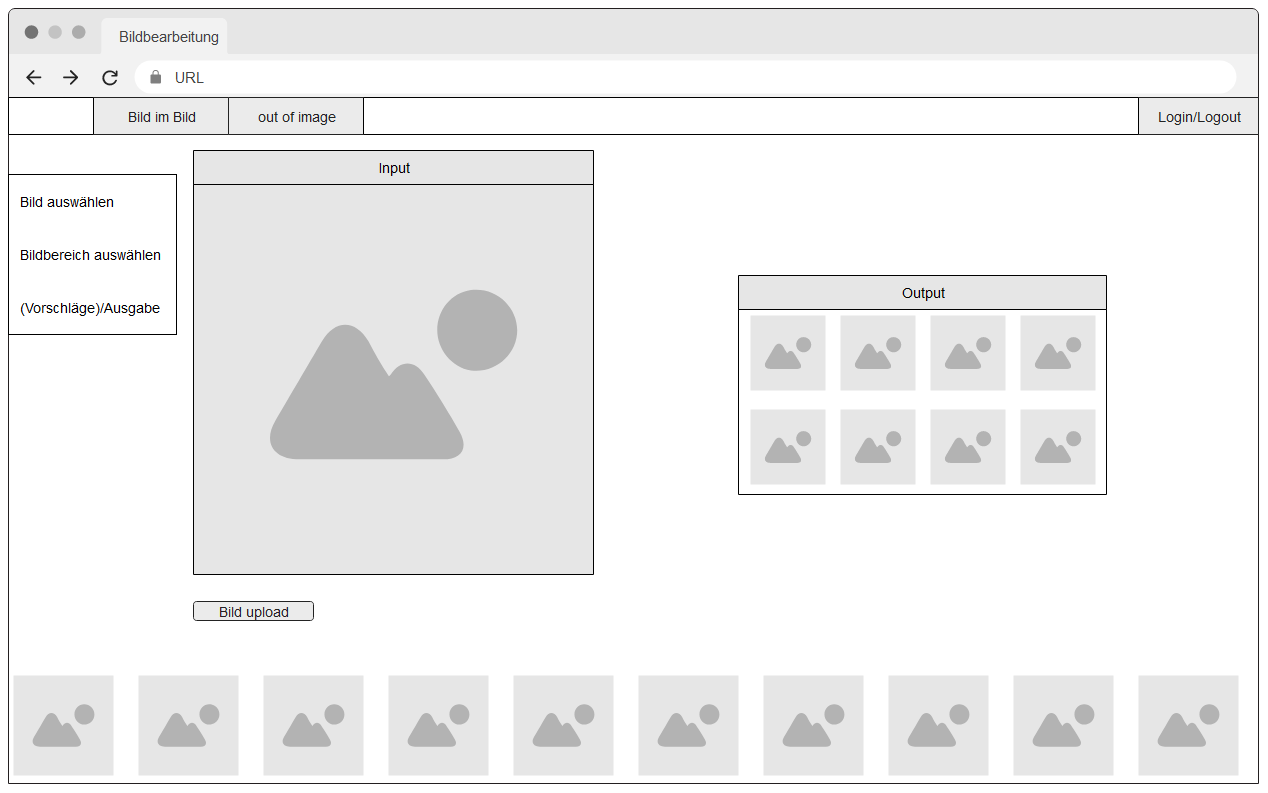

###Schritt 3

Auswahl des Bildbereiches, welcher im Fokus stehen soll (eventuell mehrere)


###Schritt 4

Bestätigen der Bereichsauswahl (Effekt wird angewandt)


###Schritt 5

Finetuning des Effektes / Auswahl aus generierten Ergebnissen zur vergrößerten Darstellung


###Schritt 6

Download des bearbeiteten Bildes


##Frontend-Umbau

Zunächst haben wir uns dazu entschieden, die vom Lehrstuhl bereitgestellte Frontend- und Backend-Demo zu nutzen und darauf aufzubauen. Dazu haben wir im nächsten Schritt mit dem Framework Vue auseinandergesetzt, um mit der gegebenen Frontend-Struktur arbeiten zu können. \\
Ziel war es zunächst, den einfachen Blur-Effekt aus der Demo mit neuen Input-Möglichkeiten zu kombinieren. Wir entschieden, dass eine Zuschnittsbibliothek (Cropper) die nutzerfreundlichste Variante zur Erfassung des gewünschten Bildabschnitts wäre. Nach versuchtem Einbau verschiedener Cropping Bibliotheken in die Vue Oberfläche mit einigen Konflikten entschieden wir uns schließlich, das Frontend von Vue zu lösen und auf vertrautes Vanilla JS umzusteigen. \\
Der Umstieg erlaubte eine reibungslose Integration eines Croppers, über den vom Nutzer ein Bildbereich ausgewählt werden kann. Im Backend konnten wir nun zielgerichtet einen Blur anwenden und die Ergebnisse für den Effekt wurden in der Weboberfläche dargestellt. \\

Im folgenen Codeabschnitt ist eine frühe Umsetzung für die Bild im Bild Methodik zu sehen.

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter, ImageColor
import urllib.request
import numpy as np

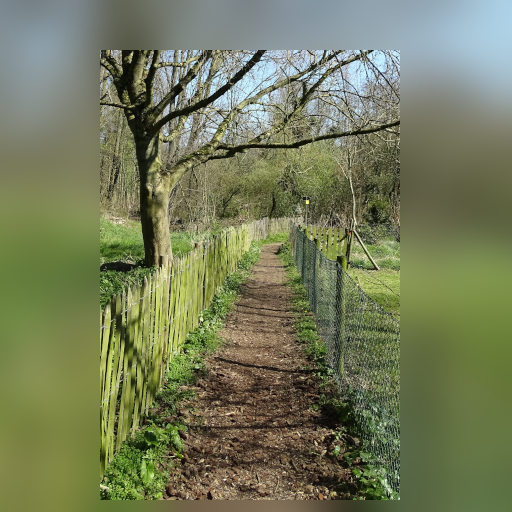

In [ ]:
# Loads an image
urllib.request.urlretrieve(
  'https://cloud.uni-oldenburg.de/s/GBo2CL2ibdS8dLt/preview',
   "original.png")

image = Image.open("original.png")

# Choose coordinates of the selection
xStart = 100
yStart = 50
xEnd = 400
yEnd = 500

# Input is cropped to coordinates
cropped_image = image.crop((int(xStart), int(yStart), int(xEnd), int(yEnd)))

# A version of the input is blurred
blurred_image = image.filter(ImageFilter.GaussianBlur(20))

# The selection is mounted on the blurred version
blurred_image.paste(cropped_image, (int(xStart), int(yStart), int(xEnd), int(yEnd)))

# Display image
display(blurred_image)

#Vorauswahl geeigneter Bilder durch CNN (verworfen)

Nachdem in der Vorlesung Convolutional Neural Networks (CNN) vorgestellt wurden, hatten wir die Idee, aus den Bildern des Nutzers mittels CNN eine Vorauswahl zu treffen. Hierbei sollten Bilder mit passender Struktur, also einem Weg, einer Straße oder Ähnlichem am unteren Bildrand wiedergegeben werden. Dies sollte Fehlversuche der Anwendung von Out-of-Image auf nicht geeignete Bilder verhindern. \\

Wir sammelten sowohl Bilder, die dieser Struktur entsprachen, als auch Bilder, auf welche dies nicht zutraf und nutzten diese als Datensatz fürs Training eines CNN. Für den Aufbau orientierten wir uns hier stark an der in der Vorlesung vorgestellten Unterscheidung zwischen Hunde- und Katzenbildern mittels CNN. \\

In der Praxis erhielten wir hier aber kaum brauchbare Ergebnisse. Die schlechten Ergebnisse schreiben wir folgenden Gründen zu: \\
* Obwohl wir theoretisch zwei Klassifizierungen für die Bilder haben, sind diese deutlich unklarer abzugrenzen, als bei der Unterscheidung zwischen Hunden und Katzen. Bilder, die nicht der Struktur entsprechen, können theoretisch fast beliebige Form annehmen und sind somit schwer auszuwählen. Auch Bilder, die der Struktur entsprechen können sehr unterschiedlich ausfallen.
* Unser Datensatz war ziemlich klein, mit insgesamt unter 50 Bildern. Gerade bei vergleichsweise unklarer Abgrenzung wäre ein größerer Datensatz notwendig.
* Die 'Data Augmentation' aus den Vorlesungsunterlagen ist auf unseren Datensatz nur sehr begrenzt anwendbar, um Datensatz zu erweitern, da sowohl Rotation, als auch Zoom die fürs uns relevante untere Bildkante verändern.

Diese Gründe, kombiniert mit einigen technischen Problemen führten dazu, dass der Ansatz verworfen wurde, um der Entwicklung der eigentlichen Out-of-Image-Methodik mehr Aufmerksamkeit zu schenken.

#Entwicklung Hough-Out-of-Image

Zu Beginn der Entwicklung des Out-of-Image Konzeptes haben wir uns mit der Frage auseinandergesetzt ob es soetwas wie Kantenausrichtungsalgorithmen gibt.
Hierbei haben wir lediglich simple Algorithmen gefunden welche dies für simple Objekte machen können. \\
Auf Hinweis eines Lehrenden haben wir uns damit auseinandergesetzt wie, die in der Vorlesung vorgestellte Hough-Transformation für unser Konzept angewandt werden kann. Wir haben uns dazu entschieden diesen Ansatz auf lediglich eine Art von Objekt und zwar Geraden zu beschränken. \\


Für die Umsetzung des Out-of-Image Vorgans mit einer Hough-Transformation würde zunächst mit einem Codebeispiel von OpenCV für die Hough-Transformation gearbeitet. Hierbei gibt es explizit ein Beispiel für die Standard Hough-Transformation und die Heuristische Hough-Transformation. \\
Hierzu wird das Bild zunächst in ein Bild in Graustufen umgewandelt, um mit Kantenerkennungsfiltern zu arbeiten. Da für die Hough-Transformation einige Kriterien erfüllt sein müssen, funktionieren nicht alle Kantenerkennungsfilter. In diesem Fall wurde mit dem Cannyfilter gearbeitet. \\
Die Methoden, welche später wieder verwendet werden, sind hier zunächst in Funktionen ausgelagert.

In [ ]:
# all required imports for the code related to the Hough-Out-of-Image variant
import cv2 as cv
import numpy as np
from sympy import Point, Line 
from PIL import Image
from google.colab.patches import cv2_imshow
import math
import urllib.request

In [ ]:
# apply canny edge detection
def cannyFilter(img):
  return cv.Canny(img, 50, 200, None, 3)

# get the standard HoughLines with specified metrics
def getHoughLines(dst):
  return cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

# get the Houristic HoughLines with specified metrics
def getHeuristicHoughLines(dst):
  return cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

##Vergleich der Ergebnisse für die Standard und Heuristische Variante

Im nächsten Schritt wurden die zwei Varianten für die Hough-Transformation getestet, um herauszufinden, welche der zwei Varianten sich besser für das weitere Vorgehen eignet. \\
Es gilt anzumerken, dass größere Teile des Codes, welche hier gezeigt werden, aktuell noch unmodifiziert sind und von OpenCV stammen.

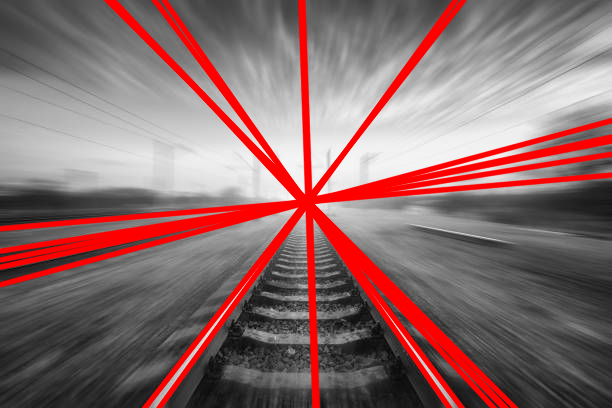

In [ ]:
# Loads an image
image = urllib.request.urlretrieve(
      'https://cloud.uni-oldenburg.de/s/ryrbamJaG4ZAHxQ/preview',
      "image.png")
image = Image.open("image.png")
imagesrc = image.copy()
imagesrc = np.array(imagesrc)
src = cv.cvtColor(imagesrc, cv.COLOR_BGR2GRAY)
dst = cv.Canny(src, 50, 200, None, 3)
cdst = cv.cvtColor(src, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
cdstP2 = np.copy(cdst)
lines = getHoughLines(dst)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
cv2_imshow(cdst)

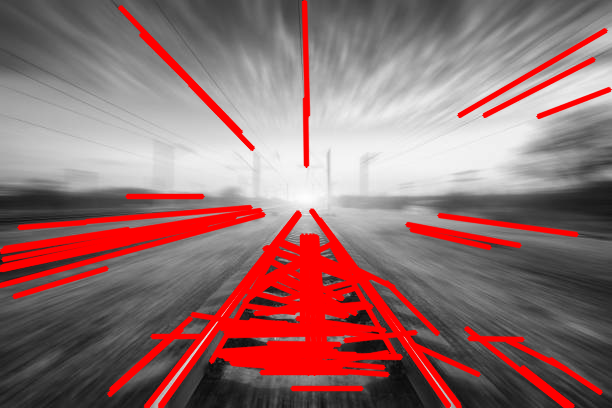

In [ ]:
linesP = getHeuristicHoughLines(dst)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
cv2_imshow(cdstP)

##Probleme
Wendet man die zwei vorangehenden Code Segmente auf (geeignete) Bilder an, so fallen zwei Probleme direkt auf.
Die Standard Hough-Transformation zieht die Geraden durch das gesamte Bild und je nachdem welches Bild zum Testen des Code-Segmentes verwendet wurde, werden oftmals Geraden erkannt, welche definitiv nicht erkannt werden sollten (vor allem bei Bildern mit Schatten).
Die heuristische Hough-Transformation nutzt, wie der Name suggeriert, eine Heuristik, hierbei entsteht das Problem, dass einige Geraden welche eigentlich nur eine Gerade sind, oftmals als mehrere Geraden erkannt werden.
Aufgrund der zuvor genannten Probleme wurde in den weiteren Schritten mit der heuristischen Hough-Transformation gearbeitet.

##Der Nächste Schritt
Im nächsten Schritt haben wir die Geraden welche wir von der Heuristischen Hough-Transformation bekommen haben gefiltert. Hierbei wurde das Bild konkret für die rechte und linke Bildhälfte behandelt, da sich die Darstellung der Punkte im Array abhängig von der Position zur horizontalen Bildmitte ändert. \\
Hierzu wurden zunächst zwei Parameter festgelegt, zum einen eine horizontal verlaufende Gerade (diese muss in der Theorie nicht horizontal verlaufen. Das Projekt hat sich allerdings nur mit Fällen beschäftigt, in welchen dies der Fall war) und eine Distanz vom unteren Bildschirmrand. Letzterer Parameter ist nötig, um sicherzustellen, dass Geraden, welche beinahe am unteren Bildschirmrand sind, auch als solche erkannt werden. Die Geraden wurden hierbei um die verbliebene Distanz verlängert, ihre Ausrichtung wird jedoch nicht beibehalten, da sich diese mit den gewählten Parametern so gut wie nicht verändert. \\
Da die horizontale Gerade in diesem Beispiel hart codiert ist, wird empfohlen, mit dem Beispielbild weiterzuarbeiten.

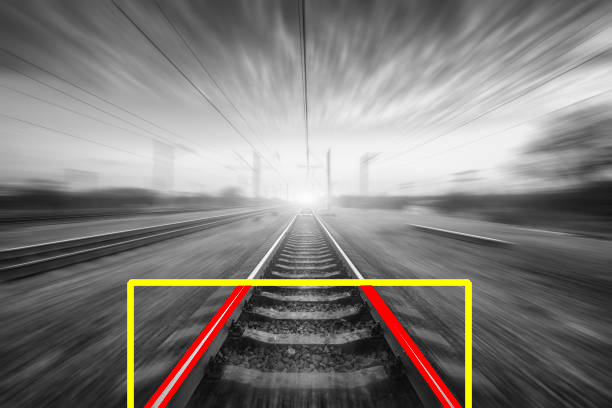

In [ ]:
x = [282,408,130,468]  #[y_oben,y_unten,x_links,x_rechts]

# get the dimensions of the image
imageSize = src.shape

# sets the valid edge bound as coordinate based on the image size, 5-10 is the range that should be used for the bounds constant based on testing
validEdgeBound = imageSize[0]-10

# initialize an empty array of values for the lines that are deemed valid (in the selection)
validLines = []
edgeLine = Line(Point(x[2], x[0]),Point(x[3],x[0]))

if linesP is not None:
            for i in range(0, len(linesP)):
                l = linesP[i][0]
                # check if lines are in range of image Selection, the code has to check for x coordinates below half the width 
                # and over half the width separately because of how they are handled
                if(x[2] < l[0] and x[3] > l[2]):
                    if(l[3] > validEdgeBound or l[1] > validEdgeBound):
                        if(l[1] > validEdgeBound):
                            l[1] = imageSize[0]
                        else:
                            l[3] = imageSize[0]
                        if(l[1] > l[3]):
                            lineToCut = Line(Point(l[0], l[1]),Point(l[2],l[3]))
                        else:
                            lineToCut = Line(Point(l[0], l[1]),Point(l[2],l[3]))
                        inter = lineToCut.intersection(edgeLine)
                        if(l[1] > l[3]):
                            l[3] = inter[0].y
                            l[2] = inter[0].x
                        else:
                            l[1] = inter[0].y
                            l[0] = inter[0].x
                        # the code snippet below can most likely be optimised out, the reason for it existing is 
                        # that the way the intersections are currently calculated causes them to be extended outside of the image selection
                        if(x[2] < l[0] and x[3] > l[2]):
                            validLines.append(l)
                        # the following 6 lines only serve any purpose for testing and visualising
                        color = ((0,0,255))
                        color2 = ((0,255,255))
                        cv.line(cdstP2, (l[0], l[1]), (l[2], l[3]), color, 3, cv.LINE_AA)
                        cv.line(cdstP2, (130, 282), (468, 282), color2, 3, cv.LINE_AA)
                        cv.line(cdstP2, (130, 282), (130, 408), color2, 3, cv.LINE_AA)
                        cv.line(cdstP2, (468, 282), (468, 408), color2, 3, cv.LINE_AA)
                      
cv2_imshow(cdstP2)

##Skalieren des Bildes
Im nächsten Schritt muss der ausgewählte Teil des Bildes skaliert werden. Hierzu muss das Bild mindestens zwei Geraden in dem ausgewählten Bildbereich haben.

In [ ]:
# takes the selected image area and creates a new image with it
test = src[x[0]:x[1],x[2]:x[3]]

# takes the furthest rightmost line and leftmost line and returns the coordinates in an array
# returns false if there are less than 2 lines
def getScalingFactor(lines):
  if(len(lines) < 2):
    return False
  minLine = lines[0]
  maxLine = lines[0]
  for n in range(0, len(lines)):
    line = lines[n]
    if(line[0] < minLine[0]):
      minLine = line
    if(line[2] > maxLine[2]):
      maxLine = line
  upperValueMinLine = minLine[2]
  lowerValueMinLine = minLine[0]
  upperValueMaxLine = maxLine[2]
  lowerValueMaxLine = maxLine[0]
  # the check below checks if the min and max line are equal to their starting values
  if((minLine == lines[0]).all() and (maxLine == lines[0]).all()):
    return False
  return (upperValueMaxLine,lowerValueMinLine,lowerValueMaxLine, upperValueMinLine)

scalingFactor = getScalingFactor(validLines)
if(scalingFactor == False):
  sys.exit()
multiplier = (scalingFactor[0] - scalingFactor[1]) / (scalingFactor[2] - scalingFactor[3])

# gets the size of the original image and calculates the new dimensions based on the multiplier
outputSize = test.shape
width = round(outputSize[0]*multiplier)
height = round(outputSize[1]*multiplier)
output = cv.resize(test, (height, width))
offset = round((scalingFactor[3]-x[2])*multiplier-scalingFactor[1])

##Zusammenfügen der Bilder
Im letzten Schritt muss das Originalbild und der skalierte Bildausschnitt zusammengefügt werden. Hierfür wird zunächst ein neues Bild erstellt, in welchem dann die zwei Bilder eingefügt werden.

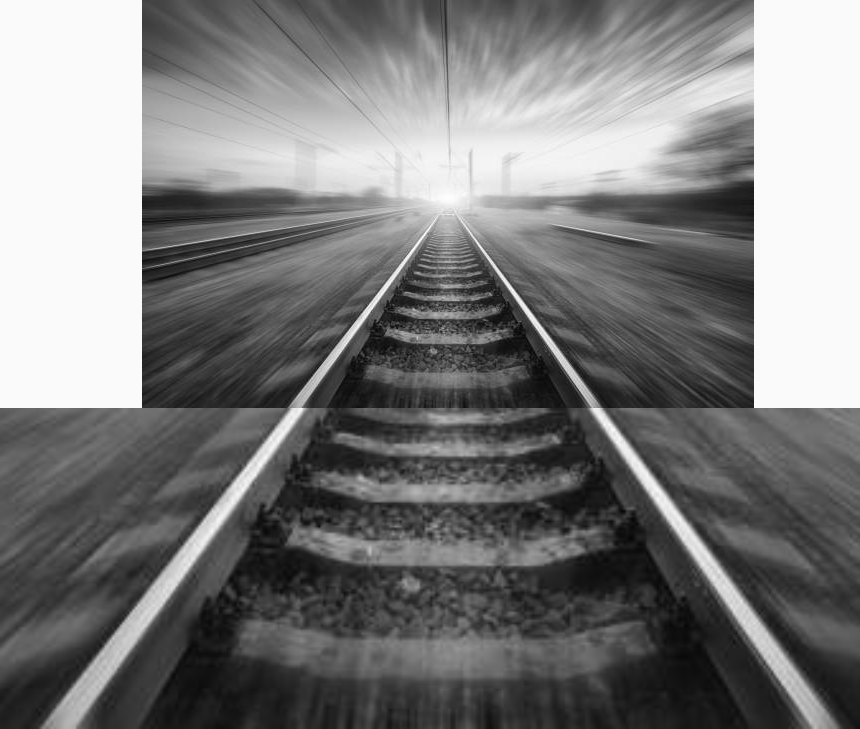

In [ ]:
# creates a new image with the required dimensions based on the size of the two images
size = output.shape[0]+imageSize[0]
new_image = Image.new('RGB',(output.shape[1],size), (250,250,250))
image1 = Image.fromarray(np.uint8(src))
new_image.paste(image1,(offset,0))
image2 = Image.fromarray(np.uint8(output))
new_image.paste(image2,(0,image1.size[1]))

out = np.array(new_image)

cv2_imshow(out)

# Entwicklung KI-Out-Of-Image

## Verwendung einer KI zur Erstellung der Out-Of-Image-Bilder
Mit der fortlaufenden Entwicklung des Ansatzes für die Kantenerkennung (Hough-Transformation) zeichnet sich ab, dass nur sehr wenige Bilder zuverlässig erweitert werden können, daher kam die Idee auf, den Weg als solchen direkt zu identifizieren. Dadurch könnten auch unsymmetrische Bereiche erweitert werden. Wichtig ist für uns eine richtige Bildmarkierung, also eine Art Image Segmentation, sodass wir die Kanten exakt erhalten.

Hierbei zeigte sich nach kurzer Recherche, dass für Image-Segmentation auch KI verwendet werden könnte.

Das Ziel dabei wäre, dass die KI das Objekt maskieren soll. Aufbauend darauf können wir uns das maskierte Objekt ausschneiden, die Unterkante am unteren Bildrand messen und x Pixel nach oben in das Bild hereingehen und dort eine horizontale Kante auf dem Objekt messen. Ausgehend von diesen zwei Werten können wir einen benötigten Skalierungsfaktor berechnen und den Bildausschnitt um Faktor x skaliert unten an das Bild ran setzen.

Da wir aufgrund der noch begrenzten Zeit keine KI mit einer Vielzahl unterschiedlicher Objekte anlernen können, haben wir uns überlegt, uns auf Wege und Straßen zu fokussieren. Wege und Straßen stellen ein klar definiertes und immer erweiterbares Objekt dar. Darüber hinaus sind Wege sowie Straßen sehr einheitlich, folgen annähernd symmetrischen Regeln und sollte daher auch gut anzulernen sein.

## Ansatz KI Bilderkennung
Bei der Suche nach einer KI zur Bilderkennung sollte zeitnah eine Maskierung genutzt werden, da wir nur das Objekt ausschneiden möchten.

Unsere Idee mit Yolo vX hat sich daher erledigt, da der Algorithmus nur das Objekt erkennt und eine Border-Box zieht, die besagte Maskierung ist zu ungenau und würde vermutlich keine guten Ergebnisse liefern, da der Weg nur als Quadrat erweitert werden könnte.

Beim Suchen sind wir aber auf zwei spannende Beiträge zum Thema Image Segmentation gestoßen, hierbei gibt es eine Vorstellung seitens Google bei TensorFlow zum Thema Image Segmentation (https://www.tensorflow.org/tutorials/images/segmentation) auf Basis eines U-Nets. Darüber hinaus haben wir einen ganz tollen Ansatz in einem Artikel bei Medium gefunden (https://medium.com/coinmonks/learn-how-to-train-u-net-on-your-dataset-8e3f89fbd623).

Aufgrund dessen, dass wir zur Präsentation (am folgenden Tag) einen Ansatz fertigstellen wollten, fiel die Wahl auf den Artikel von Medium mit der Basis von zhixuhao (https://github.com/zhixuhao/unet), da wir so bereits testen konnten ohne viel anpassen zu müssen.

##Erste Resultate vielversprechend
Für die ersten Tests wurden 8 Bilder maskiert. Hierzu wurden Bilder von Wegen und Straßen von den kostenloses Bilder-Libraries Pixabay (https://pixabay.com/) und Unsplash (https://unsplash.com/de) gezogen (Vereinzelt wurden auch Bilder über Google Bilder bezogen). Die Bilder wurden anschließend in GIMP auf ihrer kleinsten Seite auf 512px skaliert und dann auf 512 × 512px zugeschnitten. Anschließend wurde innerhalb von GIMP ein zweiter Layer erstellt, auf welchem die Maske händisch eingezeichnet wurde (weiß – kein Weg, schwarz – Weg). Ausgehend davon wurden das Bild ohne Maskierungslayer und ein zweites Bild mit Maskierungslayer als .tif-Datei exportiert, um keine Verluste zu erhalten.

Aufgrund der Begrenzung des U-Nets müssen die Bilder alle gleich Abmessungen haben, wir haben uns für 512 × 512 entschieden. Viele Bilder können so gut erweitert werden und Bilder können in das Format skaliert werden. Zur Validierung wurden zu diesem Zeitpunkt 3 Test-Bilder eingesetzt.

![](https://cloud.uni-oldenburg.de/apps/files_sharing/publicpreview/Kin5yN3Dw2gbZJW?x=2560&y=987&a=true&file=2.png&scalingup=0)
![](https://cloud.uni-oldenburg.de/apps/files_sharing/publicpreview/6sM7Zr6H7BAyw5c?x=2560&y=987&a=true&file=3.png&scalingup=0)
![](https://cloud.uni-oldenburg.de/apps/files_sharing/publicpreview/Z4Z45imQaqaM7xL?x=2560&y=987&a=true&file=1.png&scalingup=0)

Die Ergebnisse (schwarz Weg, weiß anderes Objekt/Bereich) sahen bei einigen Netzen bereits sehr vielversprechend aus (Leider gab es auch Netze, bei denen alles weiß/schwarz war).

![](https://cloud.uni-oldenburg.de/apps/files_sharing/publicpreview/qX6nB9iNXp74odg?x=2560&y=987&a=true&file=1.jpg&scalingup=0)
![](https://cloud.uni-oldenburg.de/apps/files_sharing/publicpreview/iTF5P39ya7zXbw6?x=2560&y=987&a=true&file=2.jpg&scalingup=0)
![](https://cloud.uni-oldenburg.de/apps/files_sharing/publicpreview/TPDkmRgLLF7wANq?x=2560&y=987&a=true&file=0.jpg&scalingup=0)

Um die Zuverlässigkeit des Netzes zu erhöhen, wurden weitere Bilder maskiert und als Trainings-Daten vorbereitet. Dabei wurde genauso wie bei den ersten Bildern vorgegangen. So wurde die Anzahl der Trainings-Bilder erstmal bis auf 20, dann 28 und zeitnah 36 erhöht.

Um die Qualität der KI genauer prüfen zu können, wurden zusätzliche Test-Bilder zur Validierung hinterlegt (nachfolgenden betrachten wir aber erstmal weiter die 3 bekannten Bilder).

Hierbei zeichneten sich bereits klarere Trennlinien zwischen Schwarz/Weiß im Vergleich zu den ersten Ergebnissen aus Basis von 8 Bildern. Die Genauigkeit der Bereiche ist aber noch nicht zuverlässig genug gewesen. Daher wurden die Epochen von 10 auf 20 erhöht. Dadurch konnte die Genauigkeit weiter erhöht werden.

Basis mit 20 Bildern:

![](https://cloud.uni-oldenburg.de/s/4SsKW94yDWkcgZm/preview)
![](https://cloud.uni-oldenburg.de/s/JTsExNprzPnjReB/preview)
![](https://cloud.uni-oldenburg.de/s/m6mmJnJGHetQFAq/preview)

Basis mit 28 Bildern (eher Rückschritt, aber schnell erweitert auf 36 Bilder, daher nur 2 Sample-Networks):

![](https://cloud.uni-oldenburg.de/s/Ygppae72gYiFWfP/preview)
![](https://cloud.uni-oldenburg.de/s/qFKyCEyzFmqn4Em/preview)
![](https://cloud.uni-oldenburg.de/s/pyK4Cstqr2jxbEY/preview)

Basis mit 36 Bildern:

![](https://cloud.uni-oldenburg.de/s/HNSBWCpwH6Lo6oF/preview)
![](https://cloud.uni-oldenburg.de/s/pEqcane8p2YwTCc/preview)
![](https://cloud.uni-oldenburg.de/s/zE7FwiqoYjidR9N/preview)

Aufgrund der sich immer weiter verbessernden Bilder wurde der Fokus auf die Erweiterung des Datensatzes gelegt und keine weiteren Verbesserungen am bereits funktionierenden Code durchgeführt. Grundlage für diesen Fokus waren auch die Beispieldatensätze von Google TensorFlow, welche auf 200 Daten pro Rasse von Hunden basierten. Die 36 Samples waren daher für uns zu wenig. Unsere Zielsetzung war zumindest 1/4 der Menge an Daten zu haben (50 Bilder) oder noch besser die Hälfte (100 Bilder).

Parallel wurden bereits die Parameter für die Weg/kein-Weg Erkennung per Trial-and-Error ausgetestet. Dabei wurde geschaut, ab welchem Graustufen-Wert wir zuverlässig nur den Weg und keine anderen Objekte erhalten. Hierbei kristallisierte sich der Wert 0.59 heraus. Alles unterhalb dieses Wertes konnte als Weg angesehen werden, alles darüber wurde als anderweitige Objekte angesehen.

So konnte mithilfe der pipeline.py (Siehe Github, da komplettes Netz nicht in Colab abbildbar) bereits eine einfache Maske erstellt werden.

So wurde aus dem originalen Bild:

![](https://cloud.uni-oldenburg.de/s/GBo2CL2ibdS8dLt/preview)

folgende Maskierung:

![](https://cloud.uni-oldenburg.de/s/bLy3LbyPJHpP8YQ/preview)

Hierzu wurde das Netz angewendet und auf dem ausgegebene Bild (Image-Array) alle Pixel je nach Wert auf 1/0 gesetzt. Hierzu wurden alle Werte oberhalb 0.59 zu 0 und alle darunter zu 1. Dadurch wurde der Weg weiß und die umliegenden Bereiche schwarz.

Aufbauend hierauf konnte man das folgende Bild nun als Maske verwenden und damit die Sektion aus dem Originalbild ausschneiden.

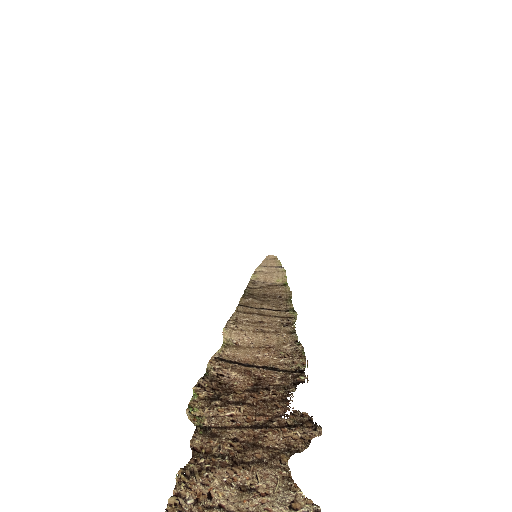

In [ ]:
from PIL import Image
import urllib.request
import numpy as np
  
urllib.request.urlretrieve(
  'https://cloud.uni-oldenburg.de/s/bLy3LbyPJHpP8YQ/preview',
   "mask.png")

urllib.request.urlretrieve(
  'https://cloud.uni-oldenburg.de/s/GBo2CL2ibdS8dLt/preview',
   "original.png")
  
original = Image.open("original.png")
image = Image.open("mask.png")

# Bild in RGBA-Farbraum überführen um Alpha-Kanal für Transparenz zu haben - Dazu in Array überführen
imgArray = np.asarray(image.convert('RGBA')).copy()

# Alle Felder mit 0 (Schwarz) zu Transparenz überführen
imgArray[:, :, 3] = (255 * (imgArray[:, :, :3] != 0).any(axis=2)).astype(np.uint8)

# Array wieder zu Bild überführen
image = Image.fromarray(imgArray)
# Original-Bild zu RGBA überführen um Alpha-Channel nicht zu verlieren
original = original.convert('RGBA')

# Bilder über Alpha-Kanal zusammenfügen (Original-Bild anhand der Maske ausschneiden)
original = Image.composite(original, image, image)

display(original)

Das Resultat sah sehr vielversprechend aus. Wichtig ist, aber, dass im späteren Ansatz die Maske vorher auf die Größe des Originalbildes skaliert wird, um die Qualität beibehalten zu können.

Parallel wurden weitere Bilder maskiert, um so insgesamt 68 Trainingsbilder zu haben. Durch die fast verdoppelte Anzahl an Bildern konnten nun auch deutlich bessere Resultate erzielt werden.

![](https://cloud.uni-oldenburg.de/s/wgtafdKoFYDWsCR/preview)
![](https://cloud.uni-oldenburg.de/s/jteSqFcqbw3CbFx/preview)
![](https://cloud.uni-oldenburg.de/s/7EzJzTMSDmtnTbf/preview)

Um das originale Bild jetzt zu erweitern, musste der maskierte Bildausschnitt unterhalb des Bildes eingefügt werden.

Hierzu kam die bereits vorgestellte Idee auf, die Maske an zwischen zwei Trennlinien auszuschneiden. Die untere Trennlinie stellt der Bildschirmrand dar, die obere ist eine horizontale Linie auf einer unbestimmten Höhe im Bild (Wichtig ist lediglich, dass dort der Weg vorhanden ist).

Da die obere und untere Trennlinie normalerweise nicht gleich sein sollten, musste jetzt die Differenz zwischen der oberen und unteren Trennlinie ermittelt werden, da die obere Trennlinie durch Skalierung genauso lang sein musste wie die untere Trennlinie.

Die Rechnung dafür ist simpel: Länge untere Linie / Länge obere Linie

Der daraus resultierende Faktor ist der Faktor, mit dem der ausgeschnittene Bildbereich vergrößert werden muss, um unter dem Bild angesetzt werden zu können.

Um die Abschnitte jetzt korrekt untereinander setzen zu können, mussten darüber hinaus die Startpositionen des Weges auf den zwei Linien bestimmt werden.

Für die obere Linie musste dies nach der Skalierung gemacht werden, um keine Fehler bei der Umrechnung zu erhalten.

Anschließend mussten die zwei Bilder untereinander gesetzt werden und zu einem Bild zusammengesetzt werden.

Nachfolgend der entsprechende Code dafür, unsere Umsetzung:

In [ ]:
!pip install --ignore-installed Pillow==9.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.2 MB/s eta 0:00:00


Pixels Top:  114
Pixels Bottom:  156
First Position Bottom:  165
Resizefactor:  1.368421052631579
New Size:  701
New Height:  137
First Position Top New:  254
Start-Position:  -89


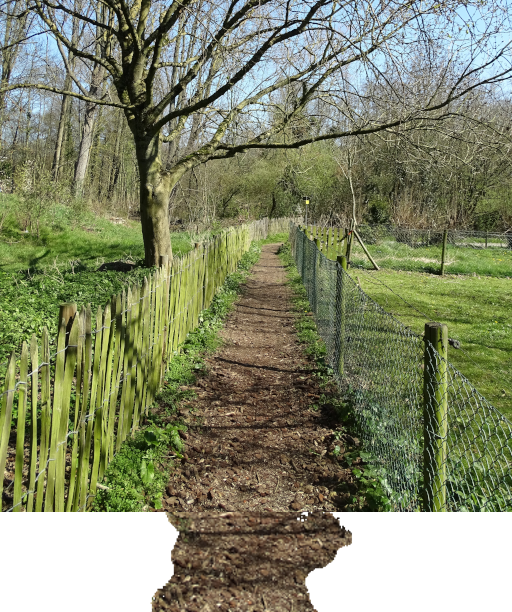

In [ ]:
    import urllib.request
    import numpy as np
    import math
    from PIL import Image
    from tensorflow.keras.utils import img_to_array
      
    urllib.request.urlretrieve(
      'https://cloud.uni-oldenburg.de/s/bLy3LbyPJHpP8YQ/preview',
      "mask.png")

    urllib.request.urlretrieve(
      'https://cloud.uni-oldenburg.de/s/GBo2CL2ibdS8dLt/preview',
      "original.png")

    size = 512;
    height = 100;

    original = Image.open("original.png")
    image = Image.open("mask.png")

    imgArray = np.asarray(image.convert('RGBA')).copy()

    imgArray[:, :, 3] = (255 * (imgArray[:, :, :3] != 0).any(axis=2)).astype(np.uint8)

    image = Image.fromarray(imgArray)
    original = original.convert('RGBA')

    pathway = Image.composite(original, image, image)

    pixelsArray = img_to_array(pathway)
    pixelsCountTop = 0
    pixelsCountBottom = 0
    firstPositionBottom = -1
    for i in range(0, size):
      if pixelsArray[(size - height), i][3] > 0.0:
        pixelsCountTop = pixelsCountTop + 1
      if pixelsArray[(size - 1), i][3] > 0.0:
        pixelsCountBottom = pixelsCountBottom + 1
        if firstPositionBottom < 0:
          firstPositionBottom = i

    resizefactor = pixelsCountBottom / pixelsCountTop
    print('Pixels Top: ', pixelsCountTop)
    print('Pixels Bottom: ', pixelsCountBottom)
    print('First Position Bottom: ', firstPositionBottom)
    print('Resizefactor: ', resizefactor)
    newSize = math.ceil(size * resizefactor)
    print('New Size: ', newSize)
    newHeight = math.ceil(height * resizefactor)
    print('New Height: ', newHeight)

    pathway = pathway.resize((newSize, newSize), Image.Resampling.BICUBIC)

    pixelsArrayNew = img_to_array(pathway)
    firstPositionNew = -1
    for i in range(0, newSize):
      if pixelsArrayNew[(newSize - newHeight), i][3] > 0.0:
        if firstPositionNew < 0:
          firstPositionNew = i
    print('First Position Top New: ', firstPositionNew)

    startPosition = firstPositionBottom - firstPositionNew
    print('Start-Position: ', startPosition)

    resultImage = Image.new('RGBA', (size, size + (height)))

    resultImage.paste(pathway, (startPosition, size - (newSize - newHeight)))
    resultImage.paste(original, (0, 0))

    display(resultImage)

Die Ergebnisse des Algorithmus waren bereits sehr vielversprechend. Nachteilig war die Berechnung der Kante, da so durch fehlende Pixel (die nicht von der KI erkannt worden sind) das Bild verschoben oder zu klein sein konnte. Die Alternative (den Skalierungsfaktor anhand der Länge von erstem bis letztem erkannten Pixel auf einer Kante festzulegen) hatte ebenfalls gravierende Nachteile, die dem aktuellen Konstrukt sogar noch überwiegen, da so ggf. der Weg gänzlich falsch platziert wurde.

Daher wurde die Alternative nicht betrachtet und lieber die verbleibende Zeit in einen besseren Grunddatensatz gesteckt, da dieser die Lücken in der Erkennung besser schließen konnte. So konnten die unerkannten Stellen des Wegs weiter reduziert werden.

Netze mit 100 Trainings-Bildern:

![](https://cloud.uni-oldenburg.de/s/GD2wfw8xgtgk9qx/preview)
![](https://cloud.uni-oldenburg.de/s/TMaKFQec95i5w8i/preview)
![](https://cloud.uni-oldenburg.de/s/kRZg8sCYtKpx9cJ/preview)

Dank der hohen Trainings-Bilder konnten wir zuletzt eine Zuverlässigkeit von ca. 95 % erreichen. Dies ist noch nicht perfekt, für den vergleichsweise aber geringen Datensatz zufriedenstellend.

#Feinschliff

## Anpassungen an Bild im Bild
Zu Ende des Projektes haben wir die Methode für Bild im Bild dann noch etwas dynamischer gemacht und das Einfügen eines Rahmens zwischen dem Bereich, der im Fokus steht und dem Hintergrund möglich gemacht.

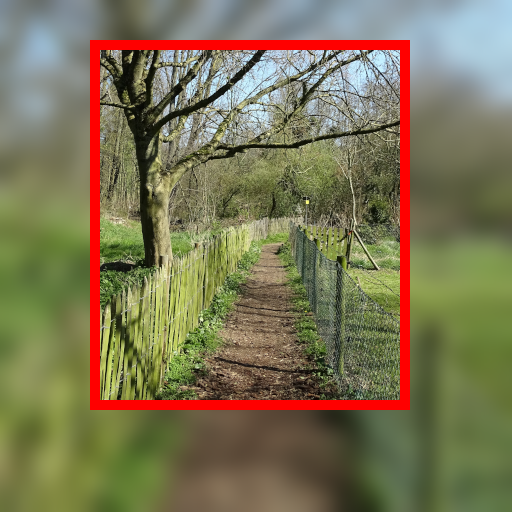

In [ ]:
# Add margin to a picture
# source: https://note.nkmk.me/en/python-pillow-add-margin-expand-canvas/
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

# Loads an image
urllib.request.urlretrieve(
  'https://cloud.uni-oldenburg.de/s/GBo2CL2ibdS8dLt/preview',
   "original.png")

image = Image.open("original.png")

# Choose coordinates of the selection, blur intensity (1 to 100) and a border
xStart = 100
yStart = 50
xEnd = 400
yEnd = 400
blur = 10
borderColor = '#ff0000'
borderWidth = 10

# Input is cropped to coordinates
cropped_image = image.crop((int(xStart), int(yStart), int(xEnd), int(yEnd)))

# A border is added to the selection
padded_image = add_margin(cropped_image, int(borderWidth), int(borderWidth), int(borderWidth), int(borderWidth), borderColor)

# A version of the input is blurred
blurred_image = image.filter(ImageFilter.GaussianBlur(radius=int(blur)))

# The selection is mounted on the blurred version
blurred_image.paste(padded_image, ((int(xStart) - int(borderWidth)), (int(yStart) - int(borderWidth)), (int(xEnd) + int(borderWidth)), (int(yEnd) + int(borderWidth))))

# Display image
display(blurred_image)

## Anpassungen am Frontend

Um die Oberfläche für die erweiterten Methoden anzupassen, war es notwendig, dass sowhl eine Auswahl der zu nutzenden Methode (Bild-im-Bild, Out-of-Image) sowie der dazugehörigen Einstellungen möglich ist.

In unserem initialen Design/Mockup wurden die Einstellungen noch nicht betrachtet. Eine Integration innerhalb der Anwendung mit Eingabefeldern hatte im Rahmen von Tests bereits eine gewisse Unübersichtlichkeit gezeigt. Daher kam die Idee auf, die EInstellungen in eine getrennte Sidebar zu setzen. So müssen die Einstellungen nur angezeigt werden, wenn diese auch wirklich gebraucht werden und so nehmen diese auch nicht wertvollen Platz in der eigentlichen Ansicht ein. Insgesamt kann so die Anwendung verschlankt werden und wirkt auf den Nutzer intuitiver und weniger überladen.

Um die zwei Methoden auswählbar zu machen, hatten wir bereits mittig im Projekt die Idee, eine Art Paging einzubauen, sodass die Methoden über Links in der Navigationsleiste ausgewählt werden können. So kann auch die Cropper-Einstellung (KI muss eine Aspect-Ratio von 1 haben) sowie die Einstellungen je nach Methodik geändert werden. Final haben wir diese Methodik über ein "Fake"-Paging implementiert. So werden durch das anlicken der Links die entsprechenden Variablen verändert und Texte angepasst, die Seite bleibt aber grundsätzlich die selbe.

Um die Auswahl der Bilder nicht so gedrückt im unteren Bereich anzusiedeln, haben wir diese zusätzlich in ein sogenanntes Modal (Popup) verlagert. Hierdurch kann bei der Auswahl die gesamte Seite verwendet werden, die Auswahl blockiert aber keinen Platz mehr, wenn diese nicht aktiv genutzt wird. Dies verschlankt, genauso wie die Einstellungs-Anpassung die eigentliche Anwendung bzw. UI.

Im Rahmen dieser Anpassungen wurden zudem grundlegende Anpassungen am Design vorgenommen, so wurde die Anwendung in ein Dark-Theme überführt und als Frontend-Library auf bootstrap und fontawesome für Icons gesetzt.

Im Vorher/Nachher-Vergleich können diese Änderungen gut erkannt werden:

**Vorher**:

![](https://cloud.uni-oldenburg.de/s/AJYJKkkJx7NGomX/preview)
![](https://cloud.uni-oldenburg.de/s/mJLXiW8catzGyW9/preview)

**Nachher**:

![](https://cloud.uni-oldenburg.de/s/BxzpZGFoZPerBy2/preview)

